<a href="https://colab.research.google.com/github/shubhamwagh/nerf-toy/blob/main/demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!git clone https://github.com/shubhamwagh/nerf-toy.git

Cloning into 'nerf-toy'...
remote: Enumerating objects: 166, done.
remote: Counting objects: 100% (157/157), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 166 (delta 68), reused 107 (delta 43), pack-reused 9
Receiving objects: 100% (166/166), 451.75 KiB | 18.07 MiB/s, done.
Resolving deltas: 100% (68/68), done.


In [11]:
import sys
sys.path.append('/content/nerf-toy')

In [19]:
!pip install imageio-ffmpeg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 26.9 MB 1.2 MB/s 


In [17]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from nerf_toy.data_loader import DataLoader
from nerf_toy.transforms import BasicEncodingTransform, PositionalEncodingTransform, GaussianFourierFeatureTransform
from nerf_toy.model import base_model
from nerf_toy.callback import NerfToyPredictionSaverCallback
from nerf_toy.metrics import PSNR, SSIM

In [14]:
img_url = "https://unsplash.com/photos/MMRd58Fo_Mk/download?force=true&w=640"
transform = GaussianFourierFeatureTransform(num_input_channels=2, mapping_size=128, scale=10)
loader = DataLoader(img_url, transform)

(1, 640, 640, 256)
(1, 640, 640, 3)


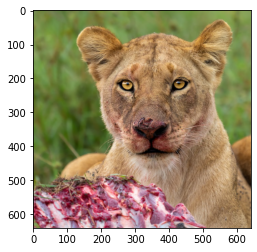

In [15]:
yx_grid, target = loader.load_data()
print(yx_grid.shape)
print(target.shape)

plt.imshow(target[0])
plt.show()

In [20]:
net = base_model(input_shape=yx_grid.shape[1:], output_dim=3, num_layers=4, num_channels=256)

loss = 'mae'
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
psnr_metric = PSNR(max_value=1.0)
ssim_metric = SSIM(max_value=1.0)
video_callback = NerfToyPredictionSaverCallback(yx_grid, target, every=1, video_path='/content')

net.compile(optimizer=optimizer, loss=loss, metrics=[psnr_metric, ssim_metric])

hist = net.fit(x=yx_grid, y=target, epochs=300, callbacks=[video_callback])

Epoch 1/300
1/1 [==============================] - 3s 3s/step - loss: 0.2665 - psnr: 9.7895 - ssim: 0.1081
Epoch 2/300
1/1 [==============================] - 1s 727ms/step - loss: 0.2622 - psnr: 9.9068 - ssim: 0.1092
Epoch 3/300
1/1 [==============================] - 1s 787ms/step - loss: 0.2580 - psnr: 10.0252 - ssim: 0.1103
Epoch 4/300
1/1 [==============================] - 1s 745ms/step - loss: 0.2538 - psnr: 10.1441 - ssim: 0.1115
Epoch 5/300
1/1 [==============================] - 1s 724ms/step - loss: 0.2497 - psnr: 10.2633 - ssim: 0.1128
Epoch 6/300
1/1 [==============================] - 1s 648ms/step - loss: 0.2457 - psnr: 10.3824 - ssim: 0.1141
Epoch 7/300
1/1 [==============================] - 1s 594ms/step - loss: 0.2418 - psnr: 10.5011 - ssim: 0.1154
Epoch 8/300
1/1 [==============================] - 1s 683ms/step - loss: 0.2380 - psnr: 10.6194 - ssim: 0.1168
Epoch 9/300
1/1 [==============================] - 1s 741ms/step - loss: 0.2343 - psnr: 10.7370 - ssim: 0.1182
Epoch 

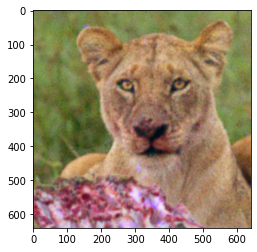

In [22]:
from nerf_toy.utils import arr_to_image
generated = net(yx_grid, training=False)
plt.imshow(arr_to_image(generated[0]))
plt.show()

In [23]:
# Display video inline
file = '/content/training_convergence_0.mp4'
from IPython.display import HTML
from base64 import b64encode
mp4 = open(file, 'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML(f'''
<video width=256 controls autoplay loop>
      <source src="{data_url}" type="video/mp4">
</video>''')